## Sleep Quality

Source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset  
Analyst: Francisco Daniel Medina  
Contact: fcodanielmh@gmail.com
Last Update: July 2023


### Import Libraries

In [40]:
# Data manipulation
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Machine Learning
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

### Importing Data

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep = ',')
df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Variable Description

**Person ID**: An identifier for each individual.  

**Gender**: The gender of the person (Male/Female).  

**Age**: The age of the person in years.  

**Occupation**: The occupation or profession of the person.  

**Sleep Duration (hours)**: The number of hours the person sleeps per day.  

**Quality of Sleep (scale: 1-10)**: A subjective rating of the quality of sleep, ranging from 1 to 10.  

**Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.  

**Stress Level (scale: 1-10)**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.  

**BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).  

**Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.  

**Heart Rate (bpm)**: The resting heart rate of the person in beats per minute.  

**Daily Steps**: The number of steps the person takes per day.  

**Sleep Disorder**: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

### Dataset EDA

In [3]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#### Analysis by Categorical Variables

#### Distribution of Age

<AxesSubplot: title={'center': 'Boxplot Age'}, xlabel='Age'>

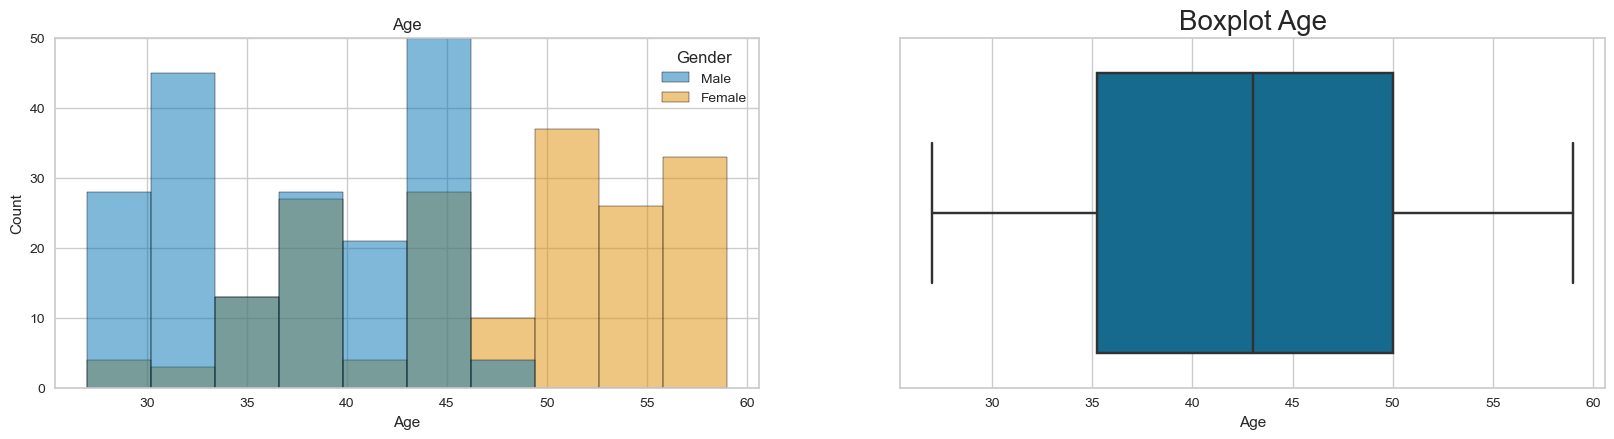

In [4]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Age')
plt.ylim(0,50)
sns.histplot(x = 'Age', hue = 'Gender', palette = 'colorblind', data = df)

plt.subplot(2, 2, 2)
plt.title("Boxplot Age", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Age"])

#### Gender stats

<AxesSubplot: title={'center': 'Sleep Disorder By BMI'}, xlabel='Sleep Disorder', ylabel='count'>

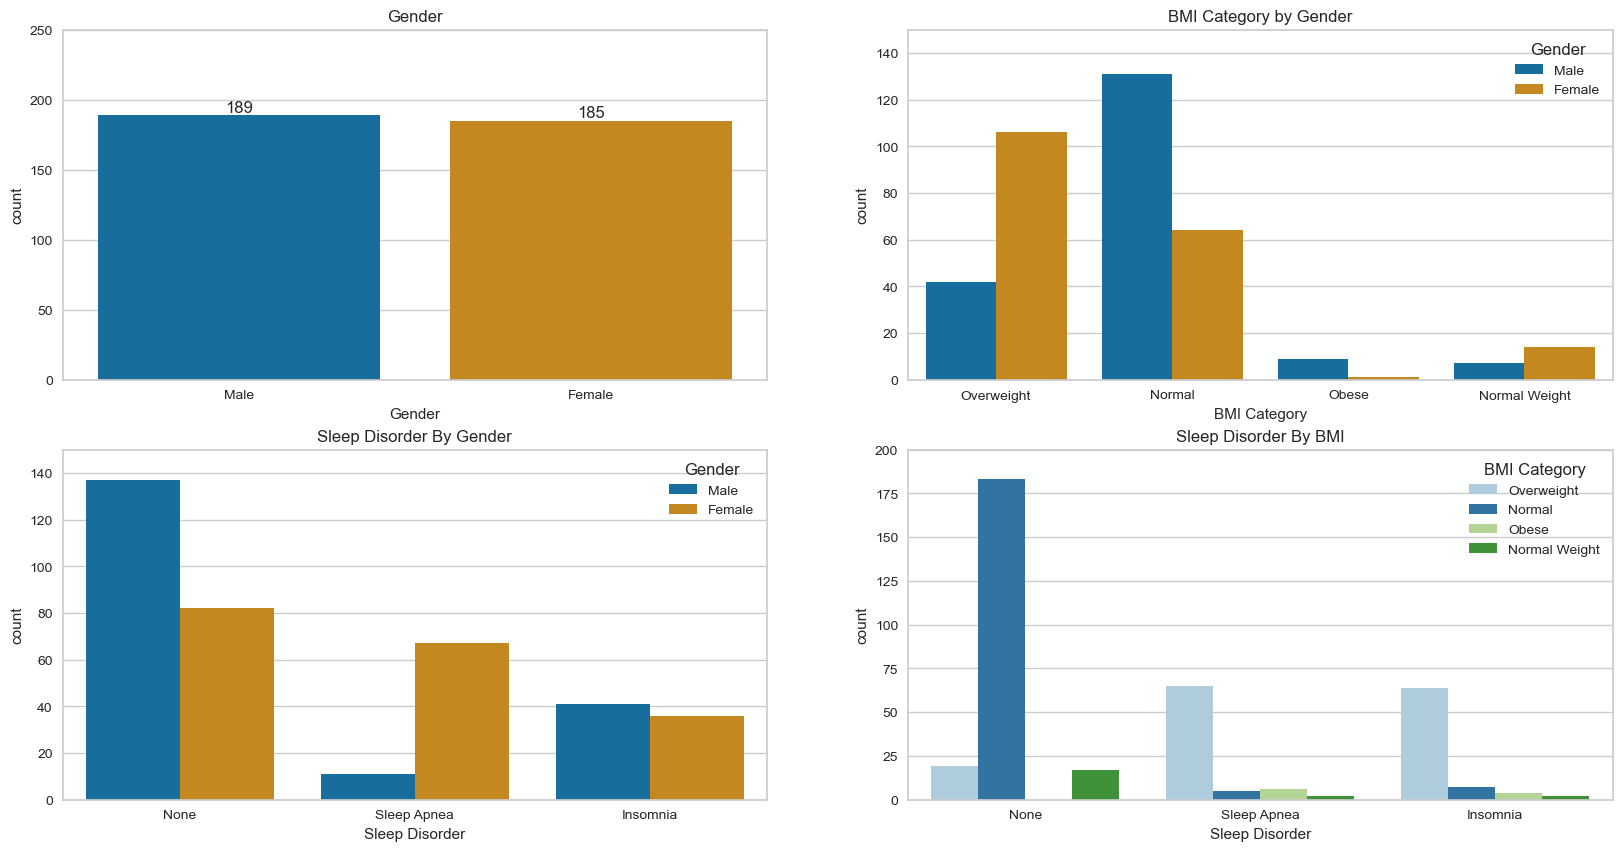

In [37]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Gender')
plt.ylim(0,250)
sns.countplot(x = 'Gender', palette = 'colorblind', data = df)
# Counts
counts = df['Gender'].value_counts()
# Add info
for i, count in enumerate(counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.subplot(2, 2, 2)
plt.gca().set_title('BMI Category by Gender')
plt.ylim(0,150)
sns.countplot(x='BMI Category', hue='Gender', palette = 'colorblind', data=df)

plt.subplot(2, 2, 3)
plt.gca().set_title('Sleep Disorder By Gender')
plt.ylim(0,150)
sns.countplot(x = 'Sleep Disorder', hue= 'Gender', palette = 'colorblind', data = df)

plt.subplot(2, 2, 4)
plt.gca().set_title('Sleep Disorder By BMI')
plt.ylim(0,200)
sns.countplot(x = 'Sleep Disorder', hue= 'BMI Category', palette = 'Paired', data = df)


#### Occupation Stats

<AxesSubplot: title={'center': 'Occupation'}, xlabel='Occupation', ylabel='count'>

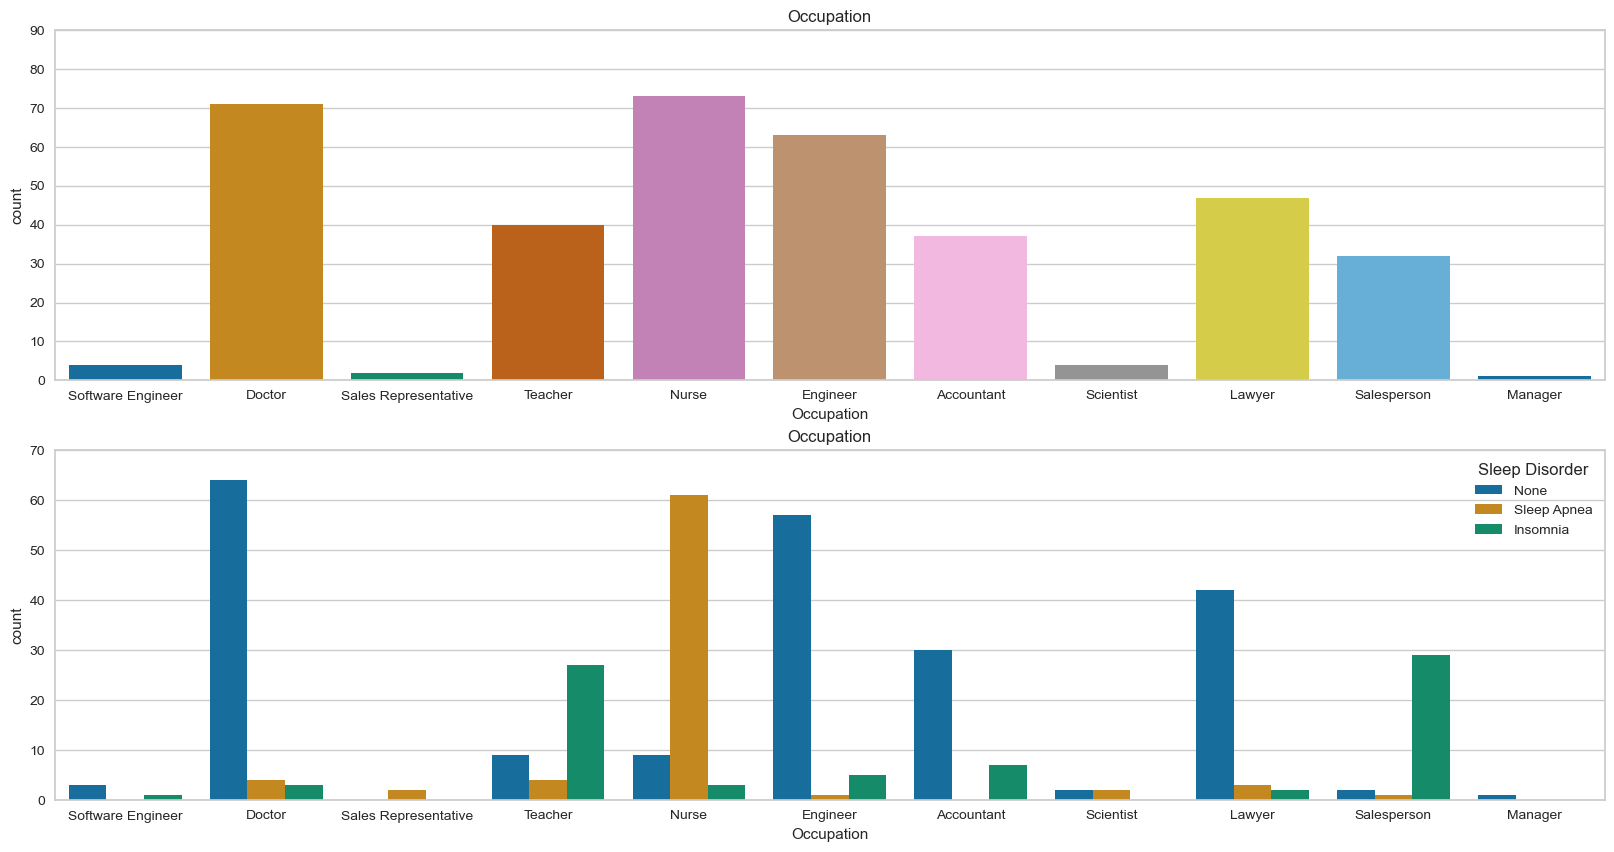

In [49]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 1, 1)
plt.gca().set_title('Occupation')
plt.ylim(0,90)
sns.countplot(x = 'Occupation', palette = 'colorblind', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Occupation')
plt.ylim(0,70)
sns.countplot(x = 'Occupation', hue = 'Sleep Disorder', palette = 'colorblind', data = df)

#### Correlation Analysis between variables

<AxesSubplot: >

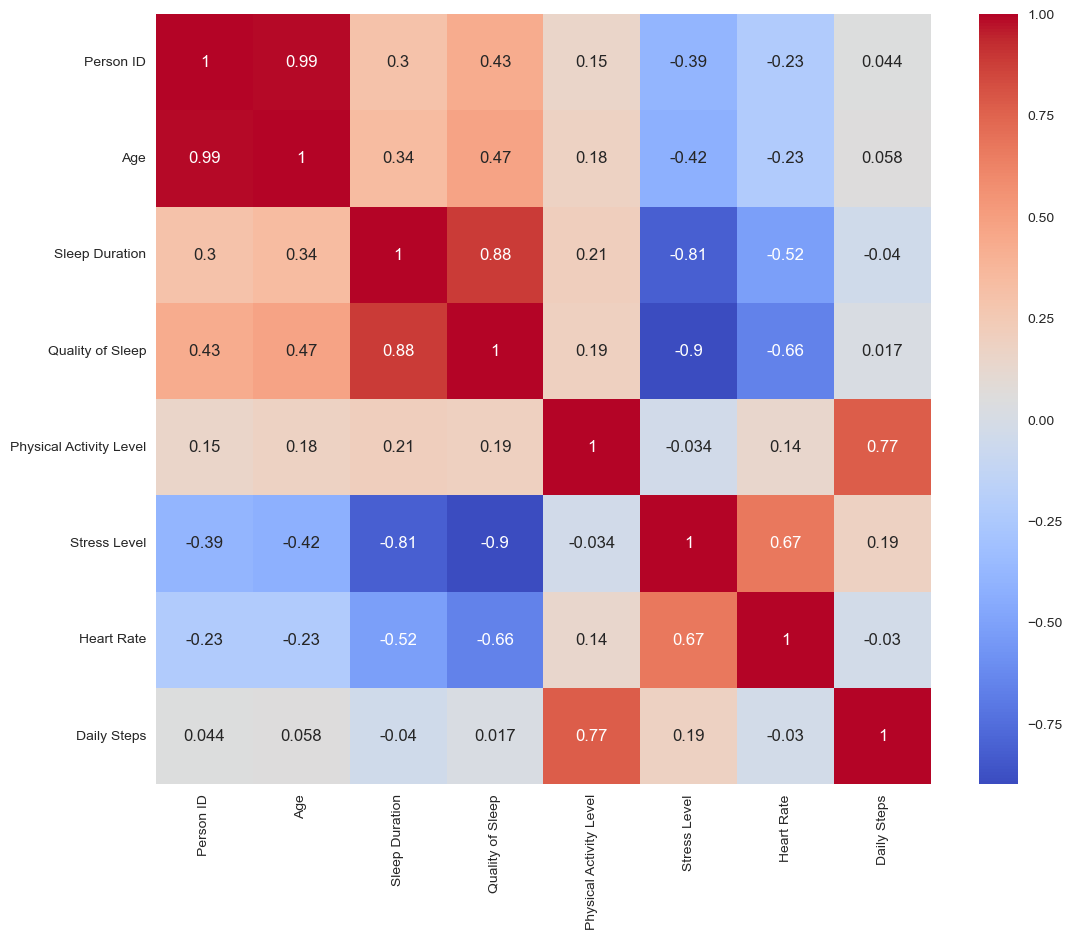

In [10]:
# Correlation Matrix
corr = df.corr(numeric_only=True).round(4)
plt.figure(figsize = (12.5,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

#### Interpretation of results

As can be observed in the correlation matrix, sleep duration is positively correlated with sleep quality and negatively correlated with stress level and heart rate.
On the other hand, there is a correlation between physical activity and daily steps.

These results can help us to reduce the variables of future models and even to be able to notice some multicollinearity that has to be processed before starting with the models.

 ### Model Building

As we seen on the previous correlation matrix, we may encounter multicollinearity between some pairs of variables.


#### Cleaning and transforming the data

In [5]:
#Not Used
df = df.drop('Person ID', axis = 1)

#Creating Dummies
hot = pd.get_dummies(df[['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']])
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], axis = 1)

In [7]:
#Split X and Y
X = df.drop('Sleep Disorder', axis = 1)
X = X.values
y = df['Sleep Disorder']

In [9]:
#Scaling
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [12]:
#Split Train and Test data
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

#### First Model: KNN

In [35]:
knn = KNeighborsClassifier()
k_list = list(range(1,5))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_

({'n_neighbors': 3}, 0.8658543746330005)

0.8938053097345132

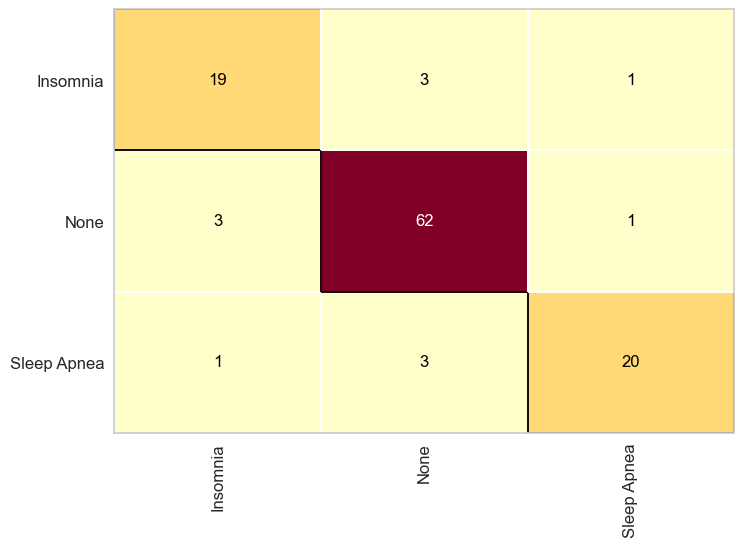

In [39]:
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [33]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

    Insomnia       0.83      0.83      0.83        23
        None       0.91      0.94      0.93        66
 Sleep Apnea       0.91      0.83      0.87        24

    accuracy                           0.89       113
   macro avg       0.88      0.87      0.87       113
weighted avg       0.89      0.89      0.89       113



In [37]:
score_knn = 0.8938053097345132

#### Second Model: Logistic Regression

0.911504424778761

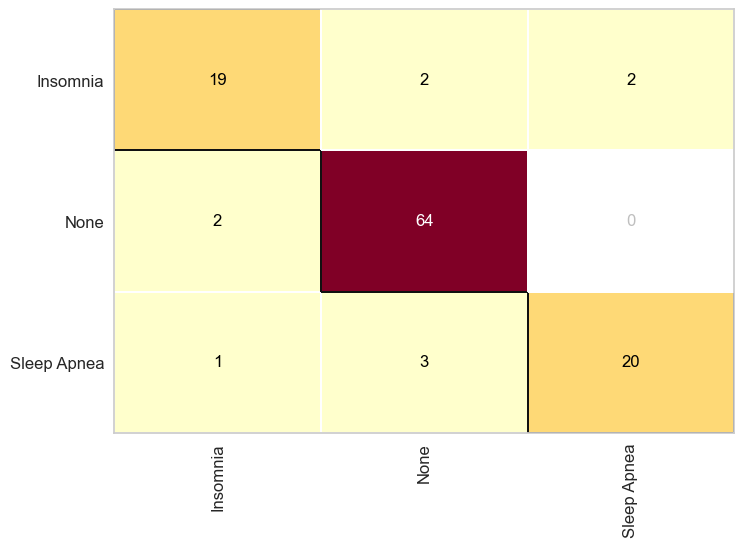

In [41]:
logistic = LogisticRegression(random_state = 1, max_iter=10000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [42]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

    Insomnia       0.86      0.83      0.84        23
        None       0.93      0.97      0.95        66
 Sleep Apnea       0.91      0.83      0.87        24

    accuracy                           0.91       113
   macro avg       0.90      0.88      0.89       113
weighted avg       0.91      0.91      0.91       113



In [43]:
logistic_normal = 0.911504424778761

#### KNN vs Logistic Reg.


In [45]:
Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Precision':logistic_normal}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Precision':score_knn}
resume = pd.DataFrame({
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1)
                      })

resume 

,KNN,Logistic Regression
Model,KNN,Logistic Regression
Scaling,Normal,Normal Data
Precision,0.893805,0.911504


#### Model Selected Logistic Regression

In [54]:
coef = logistic.coef_[0]
var_names = df.drop('Sleep Disorder', axis = 1)
var_names = list(var_names.columns.values)
coef_df = pd.DataFrame({'Var': var_names, 'Coef': coef})
print(coef_df)

                                Var      Coef
0                               Age  0.017311
1                    Sleep Duration -0.330719
2                  Quality of Sleep -0.197932
3           Physical Activity Level  0.081540
4                      Stress Level  0.298944
5                        Heart Rate -0.033501
6                       Daily Steps -0.236788
7                     Gender_Female -0.197018
8                       Gender_Male  0.197018
9             Occupation_Accountant  0.499488
10                Occupation_Doctor -0.002715
11              Occupation_Engineer  0.058304
12                Occupation_Lawyer -0.027031
13               Occupation_Manager -0.000099
14                 Occupation_Nurse -0.314107
15  Occupation_Sales Representative -0.144150
16           Occupation_Salesperson  0.236808
17             Occupation_Scientist -0.146304
18     Occupation_Software Engineer -0.095140
19               Occupation_Teacher -0.217821
20              BMI Category_Norma

In [75]:
y_pred = logistic.predict(X_test)
recall_per_class = recall_score(y_test, y_pred, average=None)
recall_weighted = recall_score(y_test, y_pred, average='weighted')
recall_macro = recall_score(y_test, y_pred, average='macro')

print("Recall per class:", recall_per_class)
print("Recall weighted:", recall_weighted)
print("Recall macro:", recall_macro)

Recall per class: [0.82608696 0.96969697 0.83333333]
Recall weighted: 0.911504424778761
Recall macro: 0.8763724198506808
